In [4]:
# link do github: https://github.com/themestrre/Metodos-Numericos

# **Nome:** Carlos Eduardo Leite de Oliveira

# **Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

import numpy as np
import matplotlib.pyplot as plt

# Função do polinômio de 5º ordem

In [5]:
# Função
def f(x):
    return (x - 1)*(x - 3)*(x - 5)*(x - 7)*(x - 9)

# Método da Secante

In [6]:
# Método da Secante
def metodo_secante(f, x0, x1, tol=1e-8, max_iter=100):
    erros = []
    xs     = [x0, x1]          # para registrar valores se quiser
    for _ in range(max_iter):
        if f(x1) - f(x0) == 0:
            break
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        erro = abs((x2 - x1)/x2)
        erros.append(erro)
        xs.append(x2)
        if erro < tol:
            break
        x0, x1 = x1, x2
    return xs[-1], erros

# Método de Muller


In [7]:
# Método de Müller
def metodo_muller(f, x0, x1, x2, tol=1e-8, max_iter=100):
    erros = []
    xs    = [x0, x1, x2]
    for _ in range(max_iter):
        h1, h2 = x1 - x0, x2 - x1
        δ1, δ2 = (f(x1)-f(x0))/h1, (f(x2)-f(x1))/h2
        d      = (δ2 - δ1)/(h2 + h1)
        b      = δ2 + h2*d
        D      = np.sqrt(b**2 - 4*f(x2)*d)
        E      = b + D if abs(b - D) < abs(b + D) else b - D
        if E == 0: break
        h      = -2*f(x2)/E
        x3     = x2 + h
        erro   = abs(h/x3)
        erros.append(erro)
        xs.append(x3)
        if erro < tol:
            break
        x0, x1, x2 = x1, x2, x3
    return xs[-1], erros

# Entrada de dados


In [ ]:
# Entrada do usuário
print("Escolha valores iniciais próximos a uma raiz de f(x):")
x0  = float(input("Secante  - x0: "))
x1  = float(input("Secante  - x1: "))
x0m = float(input("Müller   - x0: "))
x1m = float(input("Müller   - x1: "))
x2m = float(input("Müller   - x2: "))

Escolha valores iniciais próximos a uma raiz de f(x):


# Execução dos métodos


In [ ]:
# Execução dos métodos
raiz_sec, erros_sec = metodo_secante(f, x0,  x1)
raiz_mul, erros_mul = metodo_muller (f, x0m, x1m, x2m)

# Saída detalhada
print("\n--- Método da Secante ---")
print("Iter | Erro relativo")
for i, e in enumerate(erros_sec, 1):
    print(f"{i:4d} | {e:.3e}")
print(f"Total de iterações: {len(erros_sec)}")
print(f"Raiz encontrada   : {raiz_sec:.10f}")
print(f"Erro final        : {erros_sec[-1]:.3e}\n")

print("--- Método de Müller ---")
print("Iter | Erro relativo")
for i, e in enumerate(erros_mul, 1):
    print(f"{i:4d} | {e:.3e}")
print(f"Total de iterações: {len(erros_mul)}")
print(f"Raiz encontrada   : {raiz_mul:.10f}")
print(f"Erro final        : {erros_mul[-1]:.3e}")


--- Método da Secante ---
Iter | Erro relativo
   1 | 3.752e-01
   2 | 1.396e-01
   3 | 5.839e-02
   4 | 1.142e-02
   5 | 8.337e-04
   6 | 1.067e-05
   7 | 9.388e-09
Total de iterações: 7
Raiz encontrada   : 1.0000000000
Erro final        : 9.388e-09

--- Método de Müller ---
Iter | Erro relativo
   1 | 1.957e-01
   2 | 3.617e-03
   3 | 2.526e-05
   4 | 6.425e-09
Total de iterações: 4
Raiz encontrada   : 1.0000000000
Erro final        : 6.425e-09


# Gráfico

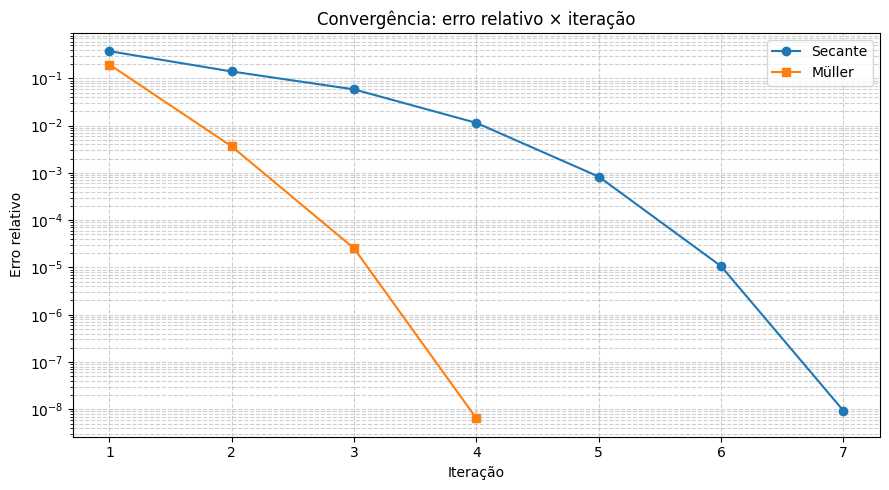

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(erros_sec)+1), erros_sec,  'o-', label="Secante")
plt.plot(range(1, len(erros_mul)+1), erros_mul,  's-', label="Müller")
plt.yscale('log')
plt.xlabel("Iteração")
plt.ylabel("Erro relativo")
plt.title("Convergência: erro relativo × iteração")
plt.grid(True, which='both', ls='--', alpha=.6)
plt.legend()
plt.tight_layout()
plt.show()
